## Aim:
1. To observe the frequency component of audio file using FFT.
2. To filter the low and high frequency components using LPF and HPF.

Text(0.5, 0, 'Frequency')

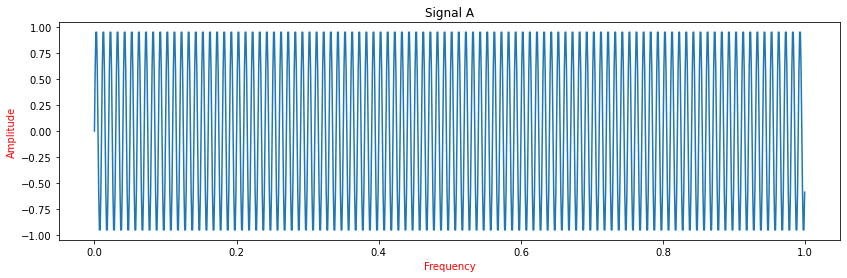

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

fs = 1000 # sampling frequency

t = np.arange(1000)/fs
signala = np.sin(2*np.pi*100*t) # with frequency of 100
plt.figure(figsize=(14,4))
plt.plot(t,signala)
plt.title('Signal A')
plt.ylabel('Amplitude', color='r')
plt.xlabel('Frequency',color='r')

<StemContainer object of 3 artists>

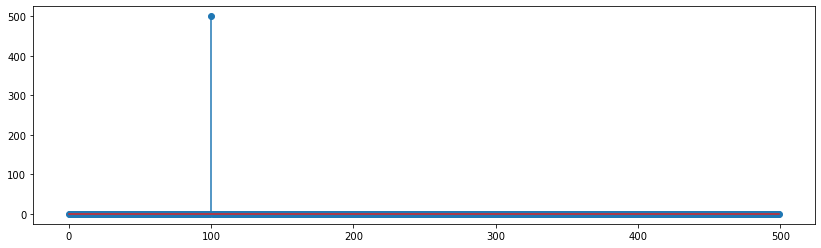

In [20]:
f1 = abs(np.fft.fft(signala))
N=len(signala)
k=np.arange(0,N)
F=k*(fs/N)
plt.figure(figsize=(14,4))
plt.stem(F[:500],f1[:500])

Text(0.5, 0, 'Frequency')

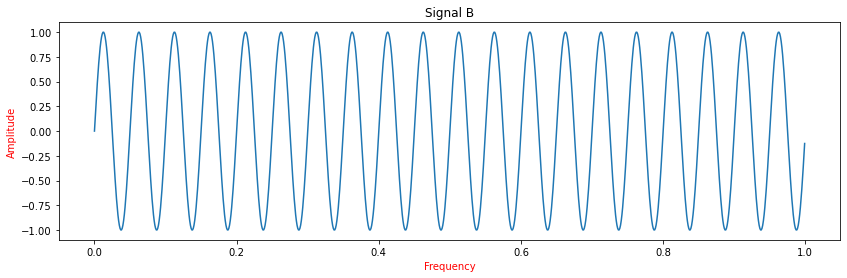

In [21]:
signalb = np.sin(2*np.pi*20*t) # with frequency of 20
plt.figure(figsize=(14,4))
plt.plot(t,signalb)
plt.title('Signal B')
plt.ylabel('Amplitude', color='r')
plt.xlabel('Frequency',color='r')

<StemContainer object of 3 artists>

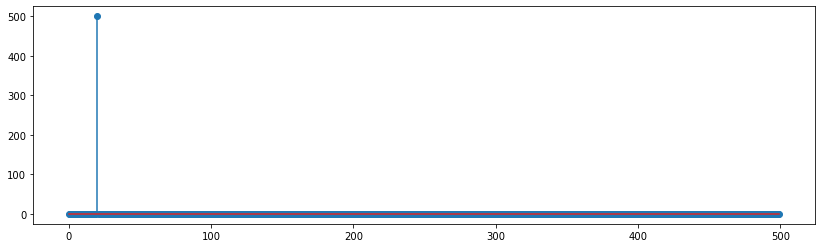

In [22]:
f2 = abs(np.fft.fft(signalb))
N=len(signalb)
k=np.arange(0,N)
F=(k*fs)/N
plt.figure(figsize=(14,4))
plt.stem(F[:500],f2[:500])

Text(0.5, 0, 'Frequency')

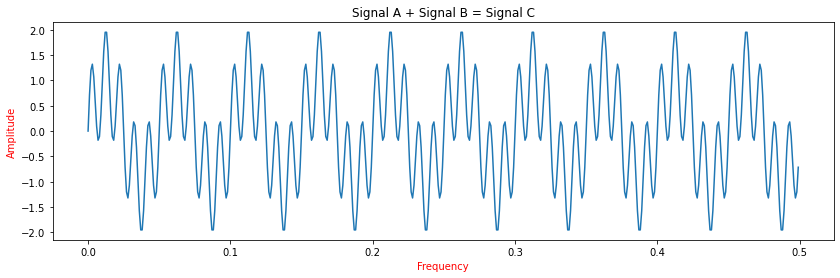

In [25]:
signalc = signala + signalb
plt.figure(figsize=(14,4))
plt.plot(t[0:500],signalc[0:500])
plt.title('Signal A + Signal B = Signal C')
plt.ylabel('Amplitude', color='r')
plt.xlabel('Frequency',color='r')

<StemContainer object of 3 artists>

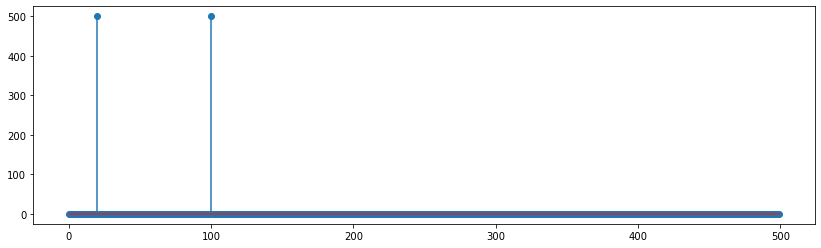

In [26]:
f3 = abs(np.fft.fft(signalc))
N=len(signalc)
k=np.arange(0,N)
F=(k*fs)/N
plt.figure(figsize=(14,4))
plt.stem(F[:500],f3[:500])

In [31]:
fc = 30 # cut-off frequency of the filter 
w = fc/(fs/2) # Normalize the frequency
b,a = signal.butter(5,w,'low') # 5-> order, w =# Normalized cut-off frequency
print(b, '\n', a)


[5.56030910e-06 2.78015455e-05 5.56030910e-05 5.56030910e-05
 2.78015455e-05 5.56030910e-06] 
 [ 1.         -4.39027619  7.74286954 -6.85434935  3.04468531 -0.54275137]


Text(0.5, 0, 'Frequency')

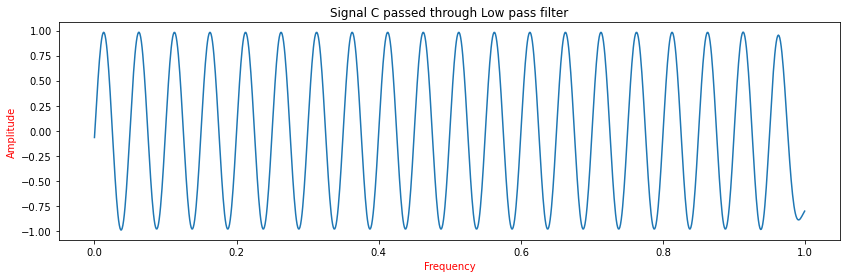

In [32]:
output = signal.filtfilt(b,a,signalc)

plt.figure(figsize=(14,4))
plt.plot(t,output)
plt.title('Signal C passed through Low pass filter')
plt.ylabel('Amplitude', color='r')
plt.xlabel('Frequency',color='r')

<StemContainer object of 3 artists>

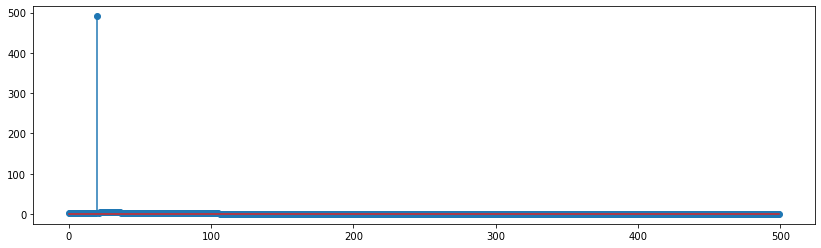

In [33]:
f4 = abs(np.fft.fft(output))
N=len(output)
k=np.arange(0,N)
F=(k*fs)/N
plt.figure(figsize=(14,4))
plt.stem(F[:500],f4[:500])

### 1. To observe the frequency component of audio file using FFT.

In [34]:
from scipy.io import wavfile
fs,data = wavfile.read('Forest.wav')

In [35]:
from IPython.display import Audio
Audio(data=data,rate=fs)

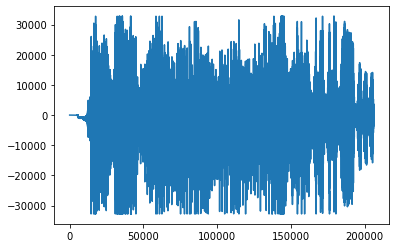

In [36]:
plt.plot(data)

In [94]:
print('Sampling frequency [ Number of samples in 1 sec] : ', fs)

Sampling frequency [ Number of samples in 1 sec] :  44100


In [95]:
print('length of audio file in samples : ',  data.size)

length of audio file in samples :  206388


In [96]:
print('length of audio file in seconds : ', data.size/fs) 

length of audio file in seconds :  4.68


<Figure size 1008x360 with 0 Axes>

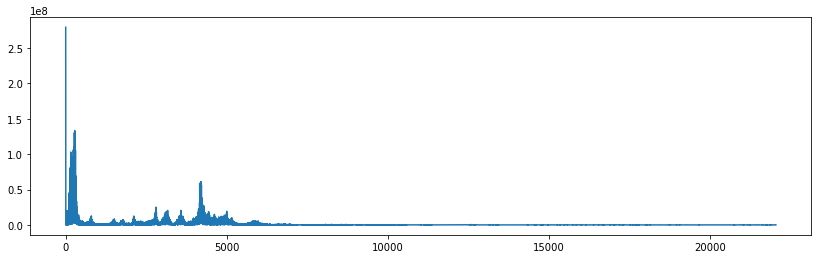

In [39]:
f5 = abs(np.fft.fft(data))
plt.figure(figsize=(14,5))
N=len(data)
k=np.arange(0,N)
FF=k*(fs/N)
plt.figure(figsize=(14,4))
plt.plot(FF[0:int(len(f5)/2)],f5[0:int(len(f5)/2)])

In [46]:
fc = 1000 # cut-off frequency of the filter 
w = fc/(fs/2) # Normalize the frequency
b,a = signal.butter(5,w,'high') # 5-> order, w =# Normalized cut-off frequency
print(b, '\n', a)

[ 0.7939203  -3.96960152  7.93920303 -7.93920303  3.96960152 -0.7939203 ] 
 [ 1.         -4.53905152  8.26066093 -7.53334038  3.44208742 -0.63030945]


Text(0.5, 0, 'Frequency')

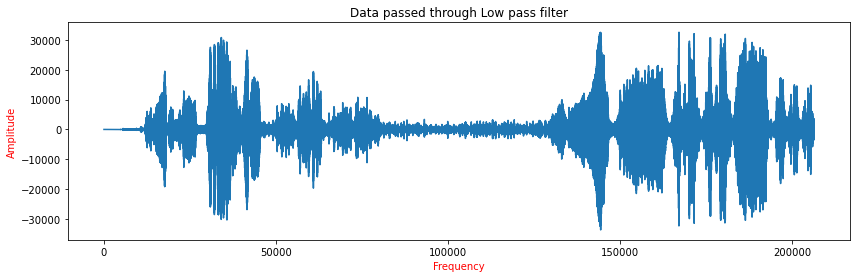

In [47]:
output_data = signal.filtfilt(b,a,data)

plt.figure(figsize=(14,4))
plt.plot(output_data)
plt.title('Data passed through Low pass filter')
plt.ylabel('Amplitude', color='r')
plt.xlabel('Frequency',color='r')

<Figure size 1008x360 with 0 Axes>

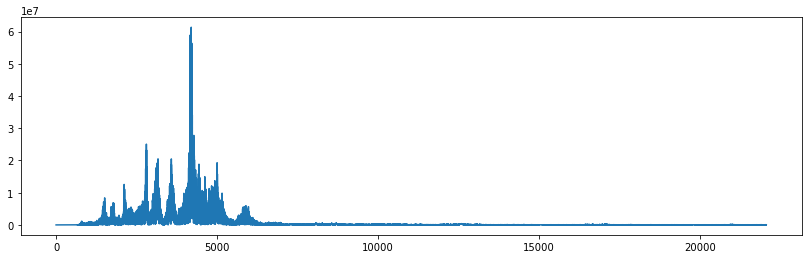

In [48]:
f6 = abs(np.fft.fft(output_data))
plt.figure(figsize=(14,5))
N=len(output_data)
k=np.arange(0,N)
FF=k*(fs/N)
plt.figure(figsize=(14,4))
plt.plot(FF[0:int(len(f5)/2)],f6[0:int(len(f5)/2)])

In [49]:
from IPython.display import Audio
Audio(data=output_data,rate=fs)

In [5]:
import cv2
  
# Save image in set directory
# Read RGB image
img = cv2.imread('img.png') 

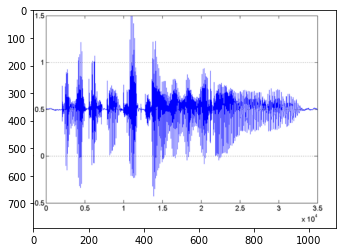

In [9]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
  
# Read Images
img = mpimg.imread('img.png')
plt.figure(figsize=(14,4))  
# Output Images
plt.imshow(img)

In [22]:
b=[0.1,-1,1]
w=np.arange(0,np.pi,0.1*np.pi)
from scipy import signal
w, h =signal.freqz(b,1,w)
abs(h)

array([0.1       , 0.28192031, 0.54033879, 0.80936336, 1.08090666,
       1.3453624 , 1.58997924, 1.80036778, 1.96255975, 2.06497645])

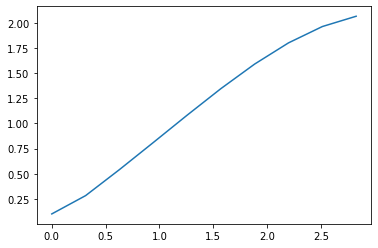

In [24]:
import matplotlib.pyplot as plt
plt.plot(w, abs(h))

In [21]:
np.angle(h)

array([ 0.        , -1.72047303, -2.40427756, -2.96518373,  2.79884081,
        2.30361143,  1.82510421,  1.35882877,  0.90124357,  0.44925186])

In [1]:
x=[1,-1,2,0]
h=[4,1,0,0]

In [3]:
import numpy as np
xk=np.fft.fft(x)
xk

array([ 2.+0.j, -1.+1.j,  4.+0.j, -1.-1.j])

In [4]:
hk=np.fft.fft(h)
hk

array([5.+0.j, 4.-1.j, 3.+0.j, 4.+1.j])

In [6]:
yk=xk*hk
yk

array([10.+0.j, -3.+5.j, 12.+0.j, -3.-5.j])

In [7]:
np.fft.ifft(yk)

array([ 4.+0.j, -3.+0.j,  7.+0.j,  2.+0.j])

In [8]:
x=[1,-1,2,-2]
h=[2,1,-1,0]

In [9]:
xk=np.fft.fft(x)
xk

array([ 0.+0.j, -1.-1.j,  6.+0.j, -1.+1.j])

In [10]:
hk=np.fft.fft(h)
hk

array([2.+0.j, 3.-1.j, 0.+0.j, 3.+1.j])

In [11]:
yk=xk*hk
yk

array([ 0.+0.j, -4.-2.j,  0.+0.j, -4.+2.j])

In [12]:
np.fft.ifft(yk)

array([-2.+0.j,  1.+0.j,  2.+0.j, -1.+0.j])

In [29]:
b=[1,2,3]
w=np.arange(0,np.pi,0.1*np.pi)
from scipy import signal
w, h =signal.freqz(b,1,w)
abs(h)

array([6.        , 5.83703745, 5.36641164, 4.64224752, 3.75368751,
       2.82842712, 2.04978685, 1.65569744, 1.7058224 , 1.90714386])

In [30]:
np.angle(h)

array([ 0.        , -0.42023956, -0.84917033, -1.29849653, -1.78802671,
       -2.35619449, -3.07384733,  2.29957081,  1.38863632,  0.64417995])